##   This code can be used for scraping detail information of TxDOT TCDS page. The function available in this file is grabbing lat and long via selenium and chrome webdrive. It can be optimzed for grabbing other information in the page. 
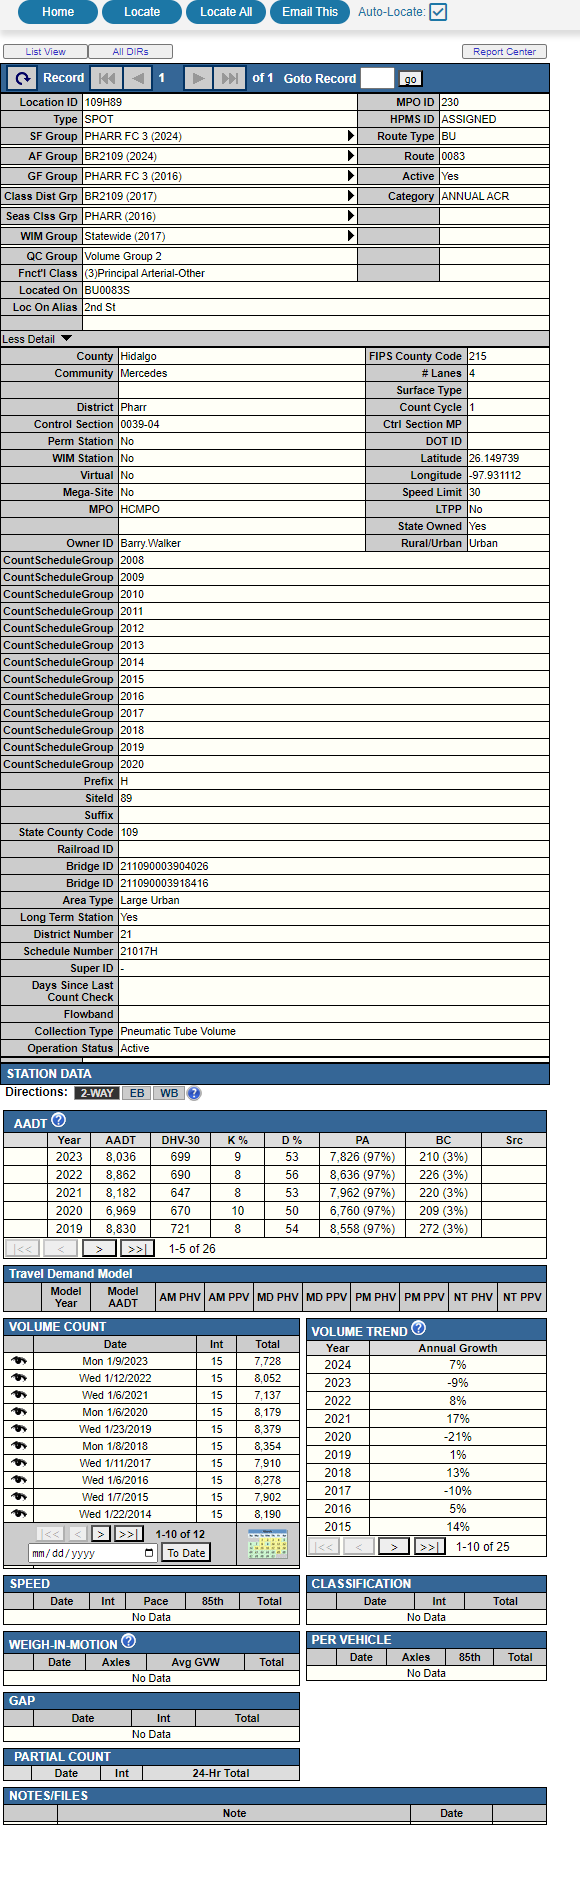
This is definately not a permanent solution, the TCDS webserver can change anytime. As of September 2024, I believe this is a slightly better approach than using request and bs4 method. It emulates human interaction with web interface, so it is slower but safer.

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import random

In [2]:
ids = ['109H89','109H0202','109E115A','109E114A','109H0206','109H86','109UR1536','109UR1539','109HP114','109H83','109UR1577','109HP168','109UR1588','109HP119','109HP192','109T29','109H82','109H111','109H112','HP968',
       '109HP196','109HP189','109HP118','109H87','109H109','109H108','109HP194','109H81','109T28','BR2109','109H110','109HP193','109HP159','109HP140','109H80','109HP8051','109UR1589','109UR1579','109HP5302','109UR1586']
output = []

In [3]:
def get_long_lat(id):
    driver = webdriver.Chrome()
    tcd_id = id
    driver.get(f'https://txdot.public.ms2soft.com/tcds/set_session.asp?ext=y&loc=txdot&LOC_AGENCY_ID=97&LOCAL_ID={tcd_id}&PARENT_LOCAL_ID=Null&MASTER_LOCAL_ID={tcd_id}&no_refresh=1&from_map=1')
    result = {'id':id}
    # Use WebDriverWait to wait for the presence of the table or relevant element to appear
    try:
        #Click "More Detail" button to expand the table.
        WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'e_detail'))).click()
        # Find the th element by its text content
        th_text = ["Latitude", "Longitude"] 
        for th in th_text:
            th_element = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, f"//th[text()='{th}']"))
            )
        
            # Once the th tag is found, find the next sibling td element
            td_element = th_element.find_element(By.XPATH, 'following-sibling::td')
        
            # Print the content of the td element
            result[th] = td_element.text
        output.append(result)

        time.sleep(random.randint(1, 3))
    except Exception as e:
        print(f"An error occurred: {e}")

    finally:
        driver.quit()

    time.sleep(random.randint(1, 3))
    

In [4]:
for id in ids:
    get_long_lat(id)


In [5]:
df = pd.DataFrame.from_dict(output)

In [12]:
df.to_csv("C:\\Users\\LiangChen\\C&M Associates, Inc\\ETSI_Weslaco Loop-TDM - Documents\\07_Modeling\LRGV Calibration\\STARSII_Long_Lat.csv",index=False)